In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_validate

In [2]:
#Importando os dados
treinamento = pd.read_csv('train-titanic.csv')
teste = pd.read_csv('test-titanic.csv')
treinamento.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
treinamento.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
491,492,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S


In [4]:
treinamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Verificando se existem dados duplicados
treinamento[treinamento.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [6]:
#Excluindo atributos que não agregam para o modelo
treinamento.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)
teste.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)

Número de sobreviventes:
 0    549
1    342
Name: Survived, dtype: int64


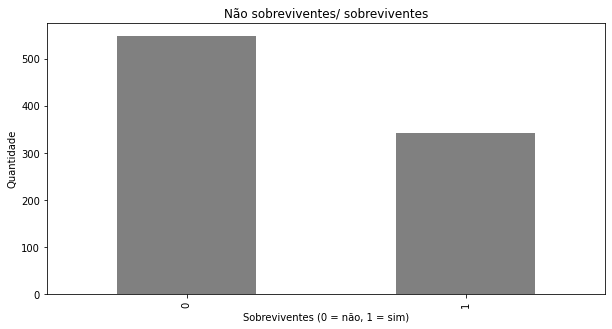

In [7]:
#Análise dos dados
#Survived (variável dependente):
contagem = treinamento['Survived'].value_counts()
print('Número de sobreviventes:\n', contagem)
ax = contagem.plot.bar(color = 'gray', figsize = (10,5), title = 'Não sobreviventes/ sobreviventes',
                      xlabel = 'Sobreviventes (0 = não, 1 = sim)', ylabel = 'Quantidade')

Classe das passagens:
 3    491
1    216
2    184
Name: Pclass, dtype: int64


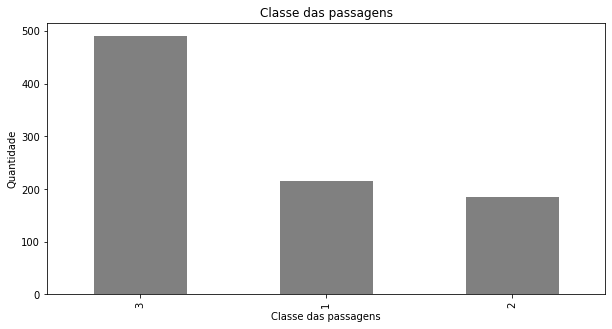

In [8]:
#Pclass
contagem_Pclass = treinamento['Pclass'].value_counts().sort_values(ascending = False)
print('Classe das passagens:\n', contagem_Pclass)
ax = contagem_Pclass.plot.bar(color = 'gray', figsize = (10,5), title = 'Classe das passagens',
                      xlabel = 'Classe das passagens', ylabel = 'Quantidade')

Podemos notar que a maioria das passagens é da 3ª classe, que seria a mais barata.

Sexo dos passageiros:
 male      577
female    314
Name: Sex, dtype: int64


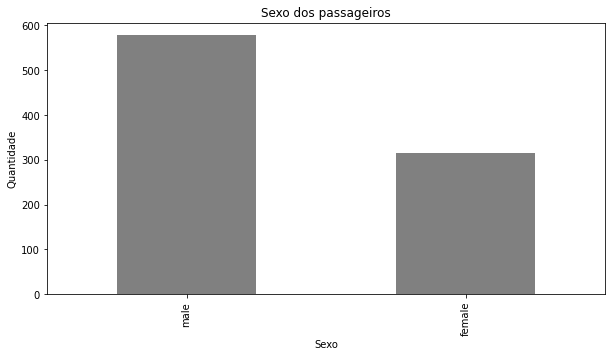

In [9]:
#Sex
contagem_Sex = treinamento['Sex'].value_counts()
print('Sexo dos passageiros:\n', contagem_Sex)
ax = contagem_Sex.plot.bar(color = 'gray', figsize = (10,5), title = 'Sexo dos passageiros',
                      xlabel = 'Sexo', ylabel = 'Quantidade')

Na embarcação, também havia quase o dobro de homens com relação às mulheres.

(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

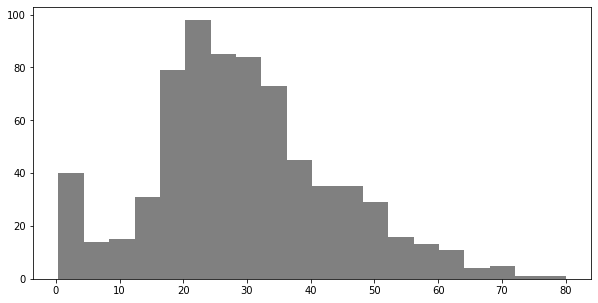

In [10]:
#Age
fig = plt.figure(figsize = (10,5))
fig.add_subplot(111)
plt.hist(treinamento['Age'], color = 'gray', bins = 20)

A idade dos passageiros se concentra, em sua maioria, entre 20 e 35 anos.

Filhos/Cônjuge a bordo:
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


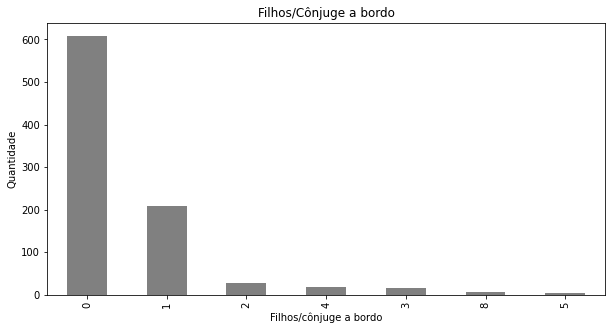

In [11]:
#SibSp
contagem_SibSp = treinamento['SibSp'].value_counts()
print('Filhos/Cônjuge a bordo:\n', contagem_SibSp)
ax = contagem_SibSp.plot.bar(color = 'gray', figsize = (10,5), title = 'Filhos/Cônjuge a bordo',
                      xlabel = 'Filhos/cônjuge a bordo', ylabel = 'Quantidade')

A maioria dos passageiros não tinham cônjuge/filhos a bordo.

Pais/Crianças a bordo:
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


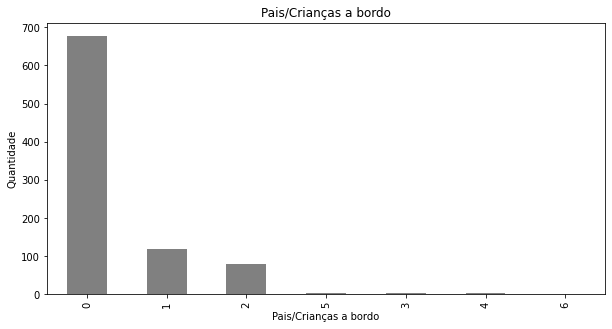

In [12]:
#Parch
contagem_Parch = treinamento['Parch'].value_counts()
print('Pais/Crianças a bordo:\n', contagem_Parch)
ax = contagem_Parch.plot.bar(color = 'gray', figsize = (10,5), title = 'Pais/Crianças a bordo',
                      xlabel = 'Pais/Crianças a bordo', ylabel = 'Quantidade')

A maioria dos passageiros também não tinham pais/crianças a bordo da embarcação.

{'whiskers': [<matplotlib.lines.Line2D at 0xc477f1ff70>,
 'caps': [<matplotlib.lines.Line2D at 0xc477f32550>,
 'boxes': [<matplotlib.lines.Line2D at 0xc477f12b20>],
 'medians': [<matplotlib.lines.Line2D at 0xc477f32af0>],
 'fliers': [<matplotlib.lines.Line2D at 0xc477f32dc0>],
 'means': []}

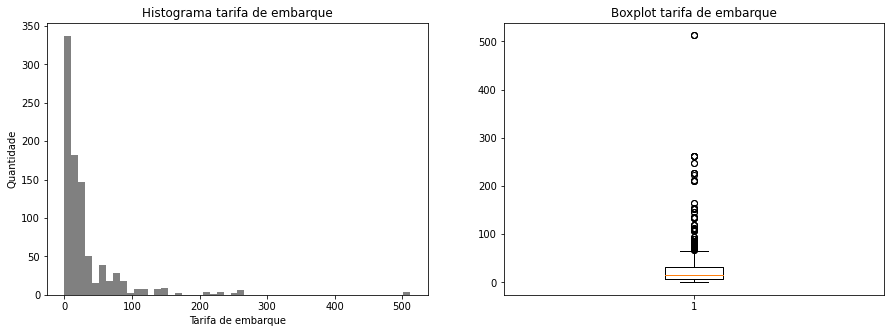

In [13]:
#Fare
fig = plt.figure(figsize = (15,5))
fig.add_subplot(1,2,1)
plt.hist(treinamento['Fare'], color = 'gray', bins = 50)
plt.title('Histograma tarifa de embarque')
plt.xlabel('Tarifa de embarque')
plt.ylabel('Quantidade')
fig.add_subplot(1,2,2)
plt.title('Boxplot tarifa de embarque')
plt.boxplot(treinamento['Fare'])

Pode-se perceber que na tarifa de embarque, a maioria dos passageiros não pagaram. Porém existem outliers.

Porto de Embarque:
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


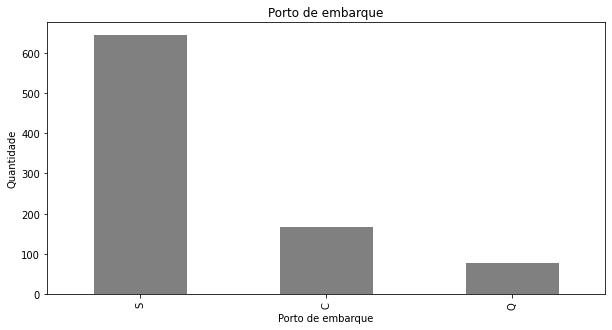

In [14]:
#Embarked
contagem_Embarked = treinamento['Embarked'].value_counts().sort_values(ascending = False)
print('Porto de Embarque:\n', contagem_Embarked)
ax = contagem_Embarked.plot.bar(color = 'gray', figsize = (10,5), title = 'Porto de embarque',
                      xlabel = 'Porto de embarque', ylabel = 'Quantidade')

Agora farei o tratamento dos dados nulos.

In [15]:
treinamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [16]:
nulos = treinamento.isnull().sum()
nulos[nulos>0].sort_values(ascending = False)

Age         177
Embarked      2
dtype: int64

In [17]:
nulosTeste = teste.isnull().sum()
nulosTeste[nulosTeste>0].sort_values(ascending = False)

Age     86
Fare     1
dtype: int64

In [18]:
#Age
media = treinamento['Age'].mean()
mediana = treinamento['Age'].median()
print('Média de idade: ', media, '\n\nMediana da idade: ', mediana)

Média de idade:  29.69911764705882 

Mediana da idade:  28.0


In [19]:
#Fare
mediaFare = treinamento['Fare'].mean()
medianaFare = treinamento['Fare'].median()
print('Média de tarifa: ', mediaFare, '\n\nMediana da tarifa: ', medianaFare)

Média de tarifa:  32.2042079685746 

Mediana da tarifa:  14.4542


Como na idade dos passageiros a distribuição se aproxima de uma distribuição normal, a média e mediana ficam bem próximas.
Já na tarifa de embarque, por influência dos outliers, a média assume valores maiores.
Vou substituir os valores nulos destas 2 variáveis pela mediana.

In [20]:
treinamento['Age'].fillna(value = mediana, inplace = True)
teste['Age'].fillna(value = mediana, inplace = True)
teste['Fare'].fillna(value = medianaFare, inplace = True)

No caso de Embarked, a maioria dos passageiros embarcou em Southampton, indicado pela letra S. Neste caso, substituires os valores nulos pela moda.

In [21]:
treinamento['Embarked'].fillna(value = 'S', inplace = True)

In [22]:
nulos = treinamento.isnull().sum()
nulos[nulos>0].sort_values(ascending = False)

Series([], dtype: int64)

In [23]:
nulosTeste = teste.isnull().sum()
nulosTeste[nulosTeste>0].sort_values(ascending = False)

Series([], dtype: int64)

In [24]:
treinamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Agora farei o tratamento das colunas do tipo object, fazendo a conversão para numérico utilizando a função get_dummies do pandas.

In [25]:
treinamento = pd.get_dummies(treinamento, drop_first = True)
teste = pd.get_dummies(teste, drop_first = True)

In [26]:
treinamento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Utilizarei Standard Scaler do scikit learn para normalizar as variáveis numéricas contínuas.

In [27]:
#StandardScaler
colunas_numericas = ['Age', 'Fare']
scaler = StandardScaler()
variaveis_escala = scaler.fit_transform(treinamento[colunas_numericas])
variaveis_escala_teste = scaler.transform(teste[colunas_numericas])

In [28]:
#Substituindo pelas variáveis normalizadas
treinamento.drop(columns = colunas_numericas, inplace = True)
variaveis_escala = pd.DataFrame(data = variaveis_escala, columns = ['Age', 'Fare'])
treinamento = pd.concat([treinamento, variaveis_escala], axis = 1)
teste.drop(columns = colunas_numericas, inplace = True)
variaveis_escala_teste = pd.DataFrame(data = variaveis_escala_teste, columns = ['Age', 'Fare'])
teste = pd.concat([teste, variaveis_escala_teste], axis = 1)

In [29]:
treinamento.head()

,Survived,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Age,Fare
0,0,3,1,0,1,0,1,-0.565736,-0.502445
1,1,1,1,0,0,0,0,0.663861,0.786845
2,1,3,0,0,0,0,1,-0.258337,-0.488854
3,1,1,1,0,0,0,1,0.433312,0.420730
4,0,3,0,0,1,0,1,0.433312,-0.486337


In [30]:
teste.head()

,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Age,Fare
0,3,0,0,1,1,0,0.394887,-0.490783
1,3,1,0,0,0,1,1.355510,-0.507479
2,2,0,0,1,1,0,2.508257,-0.453367
3,3,0,0,1,0,1,-0.181487,-0.474005
4,3,1,1,0,0,1,-0.565736,-0.401017


Agora já posso começar a desenvolver o modelo de Machine Learning.

In [31]:
y_treinamento = treinamento['Survived'].values
X_treinamento = treinamento.drop(columns = 'Survived')
X_teste = teste

Agora farei o teste com alguns modelos, para verificar qual obtém um desempenho melhor com os dados de treinamento.
Começarei por modelos mais simples.

In [32]:
#LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_treinamento, y_treinamento)

#NaiveBayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

#DecisionTree
tree = DecisionTreeClassifier()
tree.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier()

In [33]:
#Método para retornar resultado das previsões:
def previsao (modelo, previsores, alvo):
    previsoes = modelo.predict(previsores)
    acuracia = accuracy_score(alvo, previsoes)
    matriz_confusao = confusion_matrix(alvo, previsoes)
    print('Acurácia: ', round(acuracia,2), '\n\nMatriz de confusão: \n', matriz_confusao)

In [34]:
#Logistic Regression
previsao(logistic_regression, X_treinamento, y_treinamento)

Acurácia:  0.8 

Matriz de confusão: 
 [[473  76]
 [102 240]]


In [35]:
#Naive Bayes
previsao(naive_bayes, X_treinamento, y_treinamento)

Acurácia:  0.79 

Matriz de confusão: 
 [[460  89]
 [ 98 244]]


In [36]:
#Decision Tree
previsao(tree, X_treinamento, y_treinamento)

Acurácia:  0.98 

Matriz de confusão: 
 [[547   2]
 [ 16 326]]


A árvore de decisão teve um desempenho satisfatório nos dados de treinamento. Vou utilizar um cross validation para verificar como se comporta em dados de teste.

In [37]:
#Cross Validation
cross = cross_validate(tree, X_treinamento, y_treinamento, cv = 3, scoring = 'accuracy', return_train_score = True)
cross

{'fit_time': array([0.01100683, 0.00899601, 0.00500321]),
 'score_time': array([0.00500393, 0.00200224, 0.00300264]),
 'test_score': array([0.75084175, 0.78114478, 0.76430976]),
 'train_score': array([0.99158249, 0.98316498, 0.98148148])}

Apesar de uma acurácia próxima a 100% nos dados de treinamento, ao utilizar o cross validation podemos verificar que a acurácia cai para aproximadamente 75%.
Vou analisar dois modelos de ensemble, Random Forest e Gradient Boosting.

In [38]:
#Random Forest
forest = RandomForestClassifier()
forest.fit(X_treinamento, y_treinamento)

#Gradient Boosting
gradient = GradientBoostingClassifier()
gradient.fit(X_treinamento, y_treinamento)

GradientBoostingClassifier()

In [39]:
#Random Forest 
previsao(forest, X_treinamento, y_treinamento)

Acurácia:  0.98 

Matriz de confusão: 
 [[544   5]
 [ 13 329]]


In [40]:
#Gradient Boosting
previsao(gradient, X_treinamento, y_treinamento)

Acurácia:  0.89 

Matriz de confusão: 
 [[526  23]
 [ 76 266]]


Os dois modelos tem bons desempenhos nos dados de treinamento. Random Forest tem acurácia de 98% e Gradient Boosting de 89%.
Vou usar cross validation para ver como se comportam em dados de teste.

In [41]:
#Cross Validation Random Forest
cross_forest = cross_validate(forest, X_treinamento, y_treinamento, cv = 3, scoring = 'accuracy', return_train_score = True)
cross_forest

{'fit_time': array([0.25919676, 0.174124  , 0.17412305]),
 'score_time': array([0.01801181, 0.018013  , 0.01701212]),
 'test_score': array([0.76767677, 0.82154882, 0.7979798 ]),
 'train_score': array([0.99158249, 0.98316498, 0.98148148])}

In [42]:
#Cross Validation Gradient Boosting
cross_gradient = cross_validate(gradient, X_treinamento, y_treinamento, cv = 3, scoring = 'accuracy', return_train_score = True)
cross_gradient

{'fit_time': array([0.11007571, 0.0990696 , 0.10107398]),
 'score_time': array([0.002002  , 0.00300217, 0.00300264]),
 'test_score': array([0.79461279, 0.83164983, 0.81481481]),
 'train_score': array([0.91750842, 0.90740741, 0.90740741])}

O Gradient Boosting generalizou melhor nos dados de teste, chegando a obter 83% de acurácia.
Vou tentar mudar alguns hiperparâmetros.

In [43]:
gradient2 = GradientBoostingClassifier(learning_rate = 0.01, n_estimators = 1200)
gradient2.fit(X_treinamento, y_treinamento)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=1200)

In [44]:
previsao(gradient2, X_treinamento, y_treinamento)

Acurácia:  0.9 

Matriz de confusão: 
 [[528  21]
 [ 68 274]]


In [45]:
cross_gradient2 = cross_validate(gradient2, X_treinamento, y_treinamento, cv = 3, scoring = 'accuracy', 
                                 return_train_score = True)
cross_gradient2

{'fit_time': array([1.21786523, 1.17481422, 1.17183423]),
 'score_time': array([0.00802302, 0.0080049 , 0.0080049 ]),
 'test_score': array([0.78451178, 0.84511785, 0.82154882]),
 'train_score': array([0.92760943, 0.91582492, 0.91582492])}

Ao diminuir o hiperparâmetro learning_rate e aumentar o n_estimators, aparentemente o modelo teve um desempenho um pouco melhor.
Vou utilizar o modelo gradient2 para fazer a previsão nos dados de teste.

In [46]:
previsoes = gradient2.predict(X_teste)
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [47]:
previsoes = pd.DataFrame({'Survived': previsoes})
teste = pd.concat([teste, previsoes], axis = 1)

In [48]:
teste

,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Age,Fare,Survived
0,3,0,0,1,1,0,0.394887,-0.490783,0
1,3,1,0,0,0,1,1.355510,-0.507479,0
2,2,0,0,1,1,0,2.508257,-0.453367,0
3,3,0,0,1,0,1,-0.181487,-0.474005,0
4,3,1,1,0,0,1,-0.565736,-0.401017,0
...,...,...,...,...,...,...,...,...,...
413,3,0,0,1,0,1,-0.104637,-0.486337,0
414,1,0,0,0,0,0,0.740711,1.544246,1
415,3,0,0,1,0,1,0.702286,-0.502445,0
416,3,0,0,1,0,1,-0.104637,-0.486337,0
